In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# LOAD DATASET

In [326]:
df=pd.read_csv('Section-A-Q1-USA-Real-Estate-Dataset-realtor-data-Rev1 (1).csv')

# BASIC INFORMATION

In [327]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [328]:
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
562882,30807.0,for_sale,1780000.0,3.0,2.0,0.21,1325346.0,Holmes Beach,Florida,34217.0,1568.0,NaN
562883,30807.0,for_sale,979000.0,2.0,2.0,NaN,526265.0,Bradenton Beach,Florida,34217.0,960.0,2/2/2000
562884,9406.0,for_sale,4900000.0,4.0,4.0,0.34,1563004.0,Holmes Beach,Florida,34217.0,5118.0,NaN
562885,24213.0,for_sale,1710000.0,4.0,2.0,0.10,288868.0,Holmes Beach,Florida,34217.0,1000.0,3/17/1994
562886,88019.0,for_sale,3995000.0,5.0,6.0,0.11,638253.0,Bradenton Beach,Florida,34217.0,3308.0,12/15/2017


In [329]:
#See all the features columns
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [330]:
df.info()
#this tells the column names and the data types of the columns such as the integer
#float and the object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562887 entries, 0 to 562886
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     562161 non-null  float64
 1   status          562887 non-null  object 
 2   price           562458 non-null  float64
 3   bed             414243 non-null  float64
 4   bath            407989 non-null  float64
 5   acre_lot        446618 non-null  float64
 6   street          559539 non-null  float64
 7   city            562502 non-null  object 
 8   state           562883 non-null  object 
 9   zip_code        562790 non-null  float64
 10  house_size      370558 non-null  float64
 11  prev_sold_date  296735 non-null  object 
dtypes: float64(8), object(4)
memory usage: 51.5+ MB


In [331]:
# Check the missing values
df.isnull().sum()

brokered_by          726
status                 0
price                429
bed               148644
bath              154898
acre_lot          116269
street              3348
city                 385
state                  4
zip_code              97
house_size        192329
prev_sold_date    266152
dtype: int64

In [332]:
#Check the duplication duplicates can harm your model performance
df.duplicated().sum()

np.int64(0)

In [333]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,562161.000000,5.624580e+05,414243.000000,407989.000000,446618.000000,5.595390e+05,562790.000000,3.705580e+05
mean,51171.561683,5.899057e+05,3.316358,2.597587,17.570952,1.028284e+06,23219.726749,2.144188e+03
std,30457.854042,3.484756e+06,1.556244,1.478911,889.646181,5.957261e+05,10092.184523,1.677877e+04
min,0.000000,0.000000e+00,1.000000,1.000000,0.000000,4.000000e+00,0.000000,4.000000e+00
25%,23528.000000,1.500000e+05,3.000000,2.000000,0.170000,5.164835e+05,14051.000000,1.280000e+03
50%,51781.000000,3.250000e+05,3.000000,2.000000,0.340000,1.029064e+06,27596.000000,1.780000e+03
75%,78245.000000,5.650000e+05,4.000000,3.000000,1.180000,1.554528e+06,32164.000000,2.494000e+03
max,110141.000000,2.147484e+09,210.000000,212.000000,100000.000000,2.001357e+06,99999.000000,9.842382e+06


# Target Variable Distribution
Check balance of classes (important for classification).

In [334]:
df['price'].value_counts()

price
350000.0     3822
250000.0     3796
325000.0     3403
225000.0     3391
450000.0     3245
             ... 
476205.0        1
2039900.0       1
370998.0        1
368998.0        1
667280.0        1
Name: count, Length: 39927, dtype: int64

In [335]:
df['city'].nunique()

8174

In [336]:
df['city'].value_counts()
# Check Unique Values (Categorical Columns)

city
New York City    8248
Philadelphia     8147
Miami            6051
Jacksonville     5447
New York         5297
                 ... 
Isabella            1
Denbo               1
West Liberty        1
Economy             1
Cardale             1
Name: count, Length: 8174, dtype: int64

# Handle the missing values Through the (%)
because taking the decision on the basis of the count is challenging and difficult

In [337]:
#step 1: find the percentage
missing_percentage=(df.isnull().mean() *100).round(2)
missing_percentage.sort_values(ascending=False)

prev_sold_date    47.28
house_size        34.17
bath              27.52
bed               26.41
acre_lot          20.66
street             0.59
brokered_by        0.13
price              0.08
city               0.07
zip_code           0.02
status             0.00
state              0.00
dtype: float64

# 1) Target Variable first(price)

Rows with missing target values were removed.because we will not impute the target

In [338]:
df=df[df['price'].notnull()]

# 2) now we will drop the rows of "city" and "zip_code" because if we impute(means replace with Nan) this will introduce the noise

In [339]:
df=df.dropna(subset=["city","zip_code"])

In [340]:
df=df.dropna(subset=["state"])

# 3) Fill the catagorical columns (broked_by , street) with the  word "unknown":
   if we drop that we will lose the unnecessary data

In [341]:
df['brokered_by']=df['brokered_by'].fillna("unknown")

In [342]:
df["street"]=df['street'].fillna("unknown")

# 4)Calculate the median of the "bed" and "bath" columns


We use median for imputation because it is not affected by very large or very small values.It gives a more realistic value when the data is uneven, like the number of beds and bathrooms in houses.

In [343]:
df["bed"]=df["bed"].fillna(df["bed"].median())

In [344]:
df["bath"]=df["bath"].fillna(df["bath"].median())

# 5) Regional Imputation(acre_lot, house_size)

Regional imputation fills missing values using statistics from the same region to preserve local data patterns.

In [345]:
df['acre_lot']=df.groupby('state')['acre_lot']\
.transform(lambda x:x.fillna(x.median()))

In [346]:
df["house_size"]=df.groupby('state')['house_size']\
.transform(lambda x:x.fillna(x.median()))

In [347]:
df.isnull().sum()

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               3
street                 0
city                   0
state                  0
zip_code               0
house_size             3
prev_sold_date    265411
dtype: int64

# Remaining missing values after regional imputation were filled using global medians as a fallback.(acre,household)

In [348]:
df["acre_lot"]=df["acre_lot"].fillna(df["acre_lot"].median())

In [349]:
df["house_size"]=df["house_size"].fillna(df["house_size"].median())

In [350]:
df.isnull().sum()

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    265411
dtype: int64

# (prev_sold_date) column is handled by FEATURE ENGINEERING

we will not directly fill this column we will first create the feature columns from this and than fill them

In [351]:
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

In [352]:
df['has_prev_sold_date'] = df['prev_sold_date'].notna().astype(int)

In [353]:
today = pd.Timestamp.today().normalize()
df['years_since_sold'] = (today - df['prev_sold_date']).dt.days / 365.25

In [354]:
median_years = df.loc[df['years_since_sold'].notna(), 'years_since_sold'].median()
df['years_since_sold'] = df['years_since_sold'].fillna(median_years)

In [355]:
df['sold_year']  = df['prev_sold_date'].dt.year
df['sold_month'] = df['prev_sold_date'].dt.month
df['sold_year']  = df['sold_year'].fillna(0).astype(int)
df['sold_month'] = df['sold_month'].fillna(0).astype(int)

In [356]:
df.drop(columns=['prev_sold_date'], inplace=True)

In [357]:
df.isnull().sum()

brokered_by           0
status                0
price                 0
bed                   0
bath                  0
acre_lot              0
street                0
city                  0
state                 0
zip_code              0
house_size            0
has_prev_sold_date    0
years_since_sold      0
sold_year             0
sold_month            0
dtype: int64

# Outliers Detection

this will not preform on the catagorical data.

we will check the distribution ckeck
of the specific columns such as the price,house_size and the acre lots column

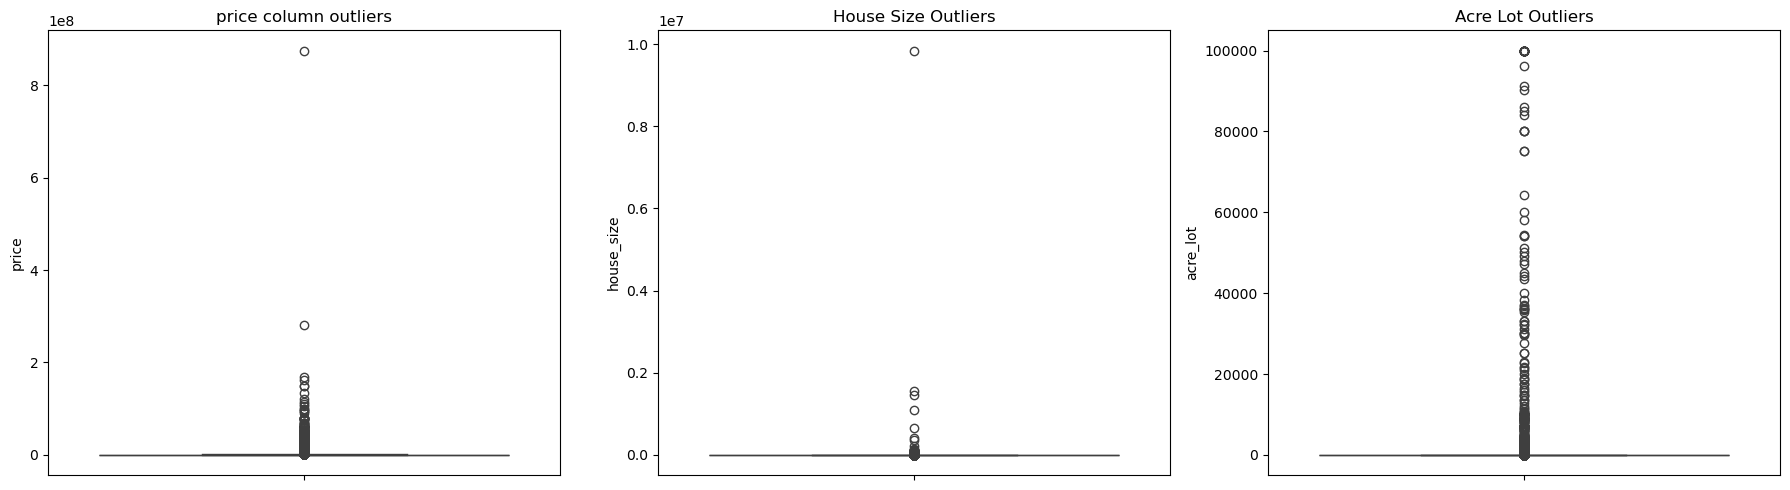

In [358]:
# price column,housesize,acrelots outliers
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["price"],ax=axes[0])
axes[0].set_title("price column outliers")
sns.boxplot(y=df['house_size'], ax=axes[1])
axes[1].set_title("House Size Outliers")
sns.boxplot(y=df['acre_lot'], ax=axes[2])
axes[2].set_title("Acre Lot Outliers")
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------------------------------------------------------------------------------
# Conclusion:Price is extremely right-skewed, indicating the presence of luxury properties.
# House size and acre lot also exhibit extreme values.

# Quantile capping is a technique used to handle outliers in data

We limit very large or very small values by setting upper and lower boundaries based on percentiles (quantiles).

In [359]:
def statewise_cap(df,column,lower_q=0.01,upper_q=0.99):
    return df.groupby("state")[column].transform(
        lambda x:x.clip(
            lower=x.quantile(lower_q),
            upper=x.quantile(upper_q)
        )
    )

# Here we just write the function which is used for the Outliers capping than now i will used this function on the each column 
# were i need to remove the outliers

In [360]:
df["price"]=statewise_cap(df,"price")

In [361]:
df["house_size"]=statewise_cap(df,"house_size")

In [362]:
df["acre_lot"]=statewise_cap(df,"acre_lot")

-------------------------------------Conclusion of this Function--------------------------

Outliers were capped at the 1st and 99th percentiles within each state to preserve regional housing market characteristics.

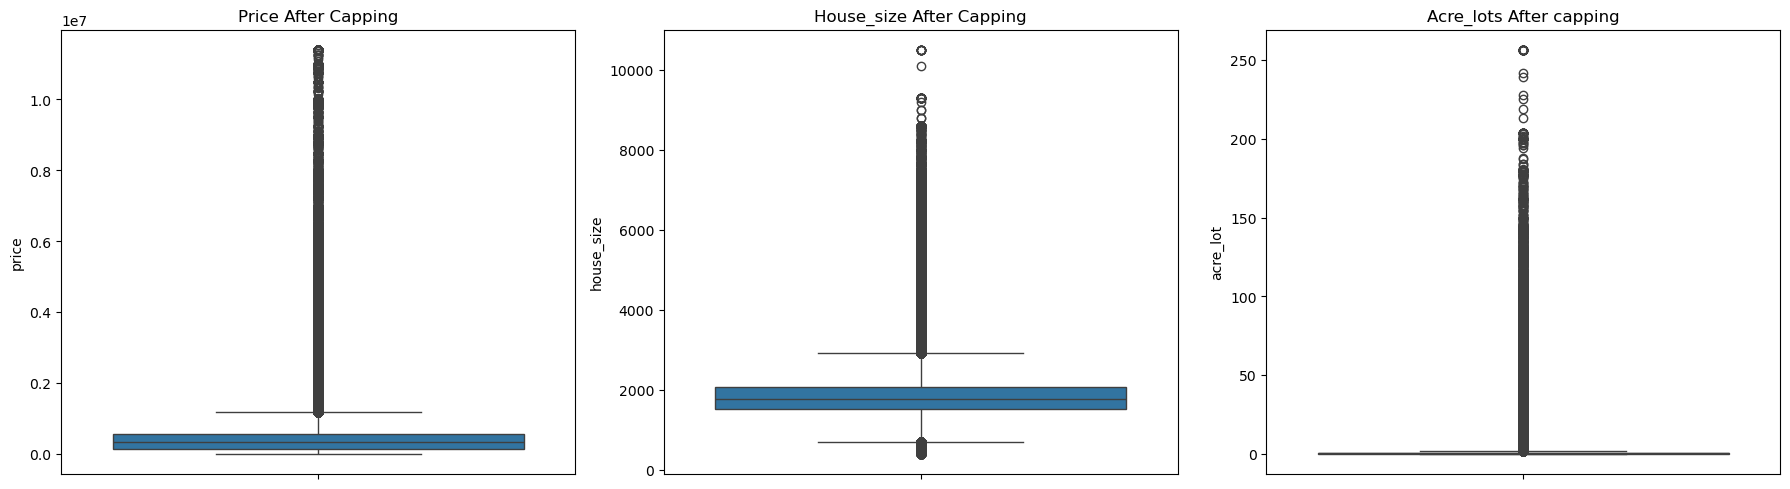

In [363]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["price"],ax=axes[0])
axes[0].set_title("Price After Capping")
sns.boxplot(y=df["house_size"],ax=axes[1])
axes[1].set_title("House_size After Capping")
sns.boxplot(y=df["acre_lot"],ax=axes[2])
axes[2].set_title("Acre_lots After capping")
plt.tight_layout()
plt.show()

Conclusion After Applying the  capping


Max values are now realistic
Extreme billion-dollar / million-acre values are gone
Distributions are stable for modeling

# PHASE 4: FEATURE ENGINEERING

1)price_per_sqft

2)lot_sqft (acre → sqft)

3)Interaction terms (bed × bath)

4)Aggregated location signals (state / zip)

In [364]:
df["price_per_sqft"]=df["price"]/df["house_size"]
df["price_per_sqft"]

0          114.130435
1           52.390308
2           89.572193
3           80.555556
4           43.565684
             ...     
562882    1135.204082
562883    1019.791667
562884     957.405236
562885    1710.000000
562886    1207.678356
Name: price_per_sqft, Length: 562010, dtype: float64

In [365]:
df["price_per_sqft"]=df["price_per_sqft"].replace([np.inf, -np.inf],np.nan)
df["price_per_sqft"]=df["price_per_sqft"].fillna(df["price_per_sqft"].median())

In [366]:
df["lot_sqft"]=df["acre_lot"]*43560
# 1 acre = 43,560 square feet
# So when acre_lot is in acres and we want area in square feet, we multiply by 43560.

In [367]:
df["bed_bath_interaction"]=df["bed"]*df["bath"]
#Multiplication is used to create an interaction feature because it captures the combined effect of bedrooms and bathrooms on house layout quality.

In [368]:
df['state_median_price'] = df.groupby('state')['price'].transform('median')
df['state_median_pps'] = df.groupby('state')['price_per_sqft'].transform('median')
#State-level aggregates capture location-based pricing patterns, which are critical in real estate data where location strongly influences house value.
#We calculate state-level medians because houses in different states have very different prices.

In [369]:
# Frequency encoding for brokered_by
broker_freq = df['brokered_by'].value_counts()

df['brokered_by_freq'] = df['brokered_by'].map(broker_freq)


In [370]:
df[['brokered_by', 'brokered_by_freq']].head()


,brokered_by,brokered_by_freq
0,103378.0,71
1,52707.0,396
2,103379.0,20
3,31239.0,8
4,34632.0,4


In [371]:
df = df.drop(columns=['brokered_by'])


In [372]:
X = df.drop(columns=['price'])
y = df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Queries Implementation and plotting

In [373]:
# Average price by bedrooms
df.groupby('bed')["price"].median().sort_index()

bed
1.0        299995.0
2.0        295000.0
3.0        240000.0
4.0        475000.0
5.0        649000.0
            ...    
99.0      5300000.0
100.0     3000000.0
123.0    11400000.0
142.0     2100000.0
210.0      575000.0
Name: price, Length: 65, dtype: float64

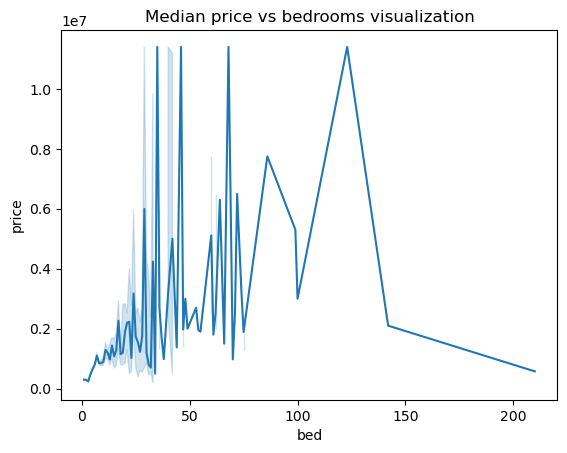

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(
    x="bed",
    y="price",
    data=df,
    estimator="median"
)
plt.title("Median price vs bedrooms visualization")
plt.show()

In [375]:
# Price vs Bathrooms (Comparison Insight)
df.groupby('bath')["price"].median().sort_index()

bath
1.0        219900.00
2.0        230000.00
3.0        450000.00
4.0        676524.00
5.0       1127679.50
6.0       1789000.00
7.0       2500000.00
8.0       2527600.00
9.0       3199900.00
10.0      3900000.00
11.0      3950000.00
12.0      2860000.00
13.0      3562418.69
14.0      2699000.00
15.0      4250000.00
16.0      2839000.00
17.0      4784918.69
18.0      4100000.00
19.0      4700000.00
20.0      2412500.00
21.0      2549000.00
22.0      4649000.00
23.0      1403795.00
24.0      3950000.00
25.0      2295000.00
26.0      1320000.00
27.0      4881418.69
28.0      2500000.00
29.0      1995000.00
30.0      3265000.00
31.0      2699000.00
32.0      7500000.00
33.0      3250000.00
35.0      3499900.00
36.0      2850000.00
37.0      2500000.00
39.0      1399000.00
42.0      4999000.00
43.0     11200000.00
44.0      6495000.00
45.0      6187500.00
46.0      6450000.00
49.0      3215625.00
51.0      7750000.00
54.0      2475000.00
56.0      4511300.00
60.0      2500000.00
64.0    

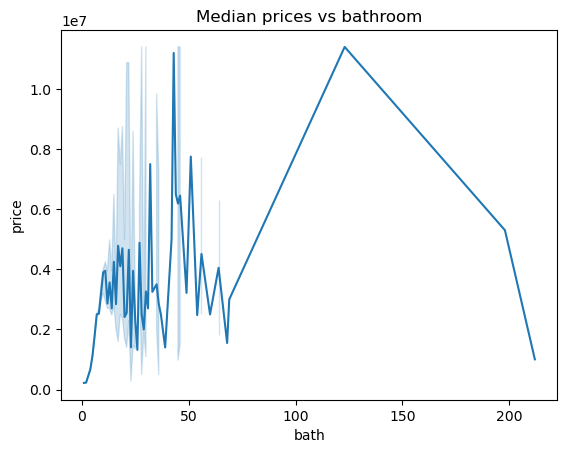

In [376]:
sns.lineplot(
    x="bath",
    y="price",
    data=df,
    estimator="median"
)
plt.title("Median prices vs bathroom")
plt.show()

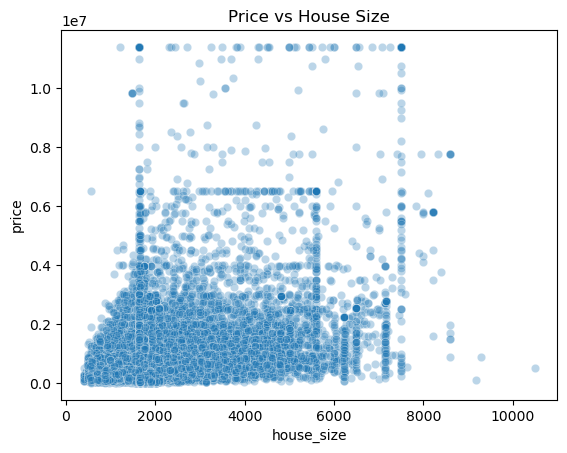

In [377]:
# Price vs House Size
sample_df = df.sample(50000, random_state=42)

sns.scatterplot(
    x='house_size',
    y='price',
    data=sample_df,
    alpha=0.3
)
plt.title("Price vs House Size")
plt.show()


In [382]:
# Status-Based Comparison (Market Insight)
df.groupby("status")["price"].median()

status
for_sale          324638.0
ready_to_build    478990.0
Name: price, dtype: float64

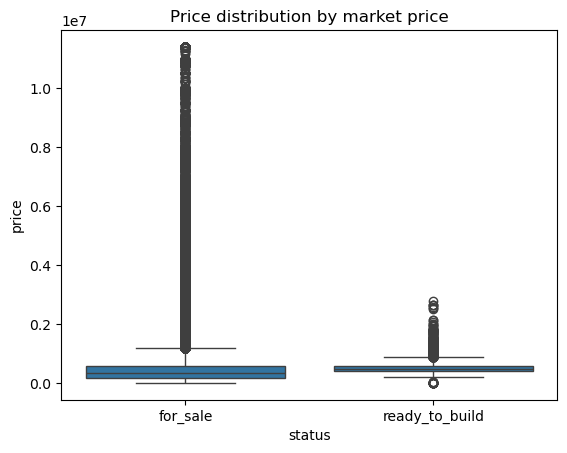

In [383]:
sns.boxplot(
    x="status",
    y="price",
    data=df
)
plt.title("Price distribution by market price")
plt.show()

# Model Evaluation


In [384]:
# Force categorical columns to string
for col in ['status', 'state']:
    df[col] = df[col].astype(str).fillna('Unknown')


In [385]:
df

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,has_prev_sold_date,years_since_sold,sold_year,sold_month,price_per_sqft,lot_sqft,bed_bath_interaction,state_median_price,state_median_pps,brokered_by_freq
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,0,10.855578,0,0,114.130435,5227.2,6.0,169900.0,117.156863,71
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,0,10.855578,0,0,52.390308,3484.8,8.0,169900.0,117.156863,396
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,0,10.855578,0,0,89.572193,6534.0,2.0,169900.0,117.156863,20
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,0,10.855578,0,0,80.555556,4356.0,8.0,169900.0,117.156863,8
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1492.0,0,10.855578,0,0,43.565684,2178.0,12.0,169900.0,117.156863,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562882,for_sale,1780000.0,3.0,2.0,0.21,1325346.0,Holmes Beach,Florida,34217.0,1568.0,0,10.855578,0,0,1135.204082,9147.6,6.0,343900.0,211.259080,3587
562883,for_sale,979000.0,2.0,2.0,0.23,526265.0,Bradenton Beach,Florida,34217.0,960.0,1,25.935661,2000,2,1019.791667,10018.8,4.0,343900.0,211.259080,3587
562884,for_sale,4900000.0,4.0,4.0,0.34,1563004.0,Holmes Beach,Florida,34217.0,5118.0,0,10.855578,0,0,957.405236,14810.4,16.0,343900.0,211.259080,8
562885,for_sale,1710000.0,4.0,2.0,0.10,288868.0,Holmes Beach,Florida,34217.0,1000.0,1,31.816564,1994,3,1710.000000,4356.0,8.0,343900.0,211.259080,35


# FINAL FEATURE GROUPING

In [386]:
final_columns=[
    'brokered_by','status','price','bed','bath','acre_lot',
    'street','city','state','zip_code','house_size',
    'has_prev_sold_date','years_since_sold','sold_year','sold_month',
    'price_per_sqft','lot_sqft','bed_bath_interaction',
    'state_median_price','state_median_pps'
    
]

# Target

In [387]:
target="price"

# Seperate The Numeric and Catagorial Features

In [388]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [389]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [390]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [391]:
numeric_features = [
    'bed','bath','acre_lot','house_size',
    'years_since_sold','sold_year','sold_month',
    'price_per_sqft','lot_sqft','bed_bath_interaction',
    'state_median_price','state_median_pps',
    'brokered_by_freq'
]

binary_features = ['has_prev_sold_date']

categorical_features = ['state', 'status']


In [392]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('passthrough', 'passthrough')
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [393]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# Model-1(Regularized Linear)Ridge

1)Housing prices change over time (inflation, demand, interest rates, economy).
So future house prices must NOT help predict past prices.

2)If we randomly split the data than the data leakage happens.

3)The dataset was split temporally using sold_year to prevent data leakage. The model was trained on historical data (≤2021) and evaluated on future data (>2021), ensuring a realistic and unbiased performance assessment.

In [394]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [395]:
ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])


In [396]:
ridge_params = {
    'model__alpha': [0.1, 1, 10]
}


In [397]:
ridge_grid = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    refit=True   
)


In [398]:
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bed',
                                                                          'bath',
                                                                          'acre_lot',
                                                                          'house_size',
                                                                          'years_since_sold',
                                                                          'sold_year',
                                                                          'sold_month',
                                                                          'price_per_sqft',
                                                                          'lot_sqft',
                                                                          'bed_bath_interaction',
                                                                          'state_median_price',
                                                                          'state_median_pps',
                                                                          'brokered_by_freq']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('passthrough',
                                                                                          'passthrough')]),
                                                                         ['has_prev_sold_date']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['state',
                                                                          'status'])])),
                                       ('model', Ridge())]),
             n_jobs=-1, param_grid={'model__alpha': [0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [399]:
best_model = ridge_grid.best_estimator_

In [400]:
# Prediction on the test data
y_pred = best_model.predict(X_test)


In [401]:
y_pred

array([  4112.03771562, 757323.6429191 , 648510.89621513, ...,
       623237.47039494, 571223.65894835,  15865.15286842])

# Matrix Evaluation

In [402]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import numpy as np
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print("MAE  :", mae)
print("RMSE :", rmse)
print("R²   :", r2)


MAE  : 150934.19861267033
RMSE : 361350.36889479466
R²   : 0.8282160400136521


# Conclusion

My model is accurately predicted 83% correct(Model-1(Regularized Linear)Ridge)

# TREE BASED (RANDOM FOREST)

In [317]:
from sklearn.ensemble import RandomForestRegressor


In [403]:
rf=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("model",RandomForestRegressor(
            n_estimators=50,
            max_depth=15,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


In [404]:
 rf.fit(X_train,y_train)
 rf_pred=rf.predict(X_test)# Random forest here predicted the prices

In [405]:
 i = 0  

 print("Actual Price   :", y_test.iloc[i])
 print("Predicted Price:", rf_pred[i])
 print("Difference     :", y_test.iloc[i] - rf_pred[i])


Actual Price   : 20000.0
Predicted Price: 19957.512897832283
Difference     : 42.48710216771724


# MATRIX EVALUATION

In [406]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [408]:
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
rf_r2=r2_score(y_test,rf_pred)
print("RF MAE  :", rf_mae)
print("RF RMSE :", rf_rmse)
print("RF R²   :", rf_r2*100)


RF MAE  : 1899.3598548324223
RF RMSE : 14626.821848278456
RF R²   : 99.97185342544148


# Conclusion:

This model is predicted the result about 99.9 % accurately

# MODEL-3 — GRADIENT BOOSTING

In [409]:
from sklearn.ensemble import GradientBoostingRegressor


In [427]:
gbr=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("model",GradientBoostingRegressor(
            n_estimators=50,
            learning_rate=0.03,
            max_depth=3,
            random_state=42
        ))
        
    ]
)

In [428]:
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [413]:
# Test on the random points

In [429]:
i=2
print("Actual Price",y_test.iloc[i])
print("predicted Price",gbr_pred[i])
print("Difference",y_test.iloc[i]-gbr_pred[i])

Actual Price 595000.0
predicted Price 553778.8272624467
Difference 41221.17273755325


# Conclusion

My model is accurately predicted about 87 percent